<img src="https://cdn-icons-png.flaticon.com/512/1012/1012232.png" align=left width=77, heigth=77>

# Промышленность — задача проекта

Металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали, чтобы оптимизировать производственные расходы. Предстоит построить модель, которая предскажет температуру стали.

## Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

## Описание данных
- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец key содержит номер партии. В файлах есть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

## План решения задачи
1) Загрузка и обзор данных

2) EDA

3) Подготовка данных 

4) Обучение модели

5) Отчёт о проделанной работе

## Цель

Создание модели для предсказания температуры стали

## Список уточняющих вопросов

* 1) С чем связаны пропуски в данных, так как к примеру в признаках в которых есть пропуски, пропуски примерно составляют 25% от всех данных этого признака.
* 2) Какие значения принимать за выбросы у каждого признака, так как я не знаком с этим направлением промышленности, поэтому не могу предположить какие значения считаются допустимыми на каждом этапе обработки стали.
* 3) И хотелось бы по больше узнать о процессе обработки стали.

### 1. Загрузка необходимых библиотек и данных

In [1]:
!pip install -q phik

In [2]:
!pip install -q imbalanced-learn

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from phik.report import correlation_report, plot_correlation_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import  make_pipeline
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor

RND = 270323
sns.set_style("darkgrid")

In [4]:
try:
    #данные об электродах
    data_arc = pd.read_csv('C:/Users/dmitr/OneDrive/Документы/DataScience/17 Дипломный проект/final_steel/final_steel/data_arc.csv')
    
    #данные о подаче сыпучих материалов (объём)
    data_bulk = pd.read_csv('C:/Users/dmitr/OneDrive/Документы/DataScience/17 Дипломный проект/final_steel/final_steel/data_bulk.csv')

    #данные о подаче сыпучих материалов (время)
    data_bulk_time = pd.read_csv('C:/Users/dmitr/OneDrive/Документы/DataScience/17 Дипломный проект/final_steel/final_steel/data_bulk_time.csv') 

    #данные о продувке сплава газом
    data_gas = pd.read_csv('C:/Users/dmitr/OneDrive/Документы/DataScience/17 Дипломный проект/final_steel/final_steel/data_gas.csv')

    #результаты измерения температуры
    data_temp = pd.read_csv('C:/Users/dmitr/OneDrive/Документы/DataScience/17 Дипломный проект/final_steel/final_steel/data_temp.csv')

    #данные о проволочных материалах (объём)
    data_wire = pd.read_csv('C:/Users/dmitr/OneDrive/Документы/DataScience/17 Дипломный проект/final_steel/final_steel/data_wire.csv')

    #данные о проволочных материалах (время)
    data_wire_time = pd.read_csv('C:/Users/dmitr/OneDrive/Документы/DataScience/17 Дипломный проект/final_steel/final_steel/data_wire_time.csv')

except:
    data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
    data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
    data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

### 2. Анализ данных

Построим функцию для общего анализа каждого датасета

In [5]:
def analyze_data(data):
    print('Первые 5 строк датасета --------------------------------------------------------------------------------------')
    display(data.head())
    print('Последние 5 строк датасета -----------------------------------------------------------------------------------')
    display(data.tail())
    print('Статистика по датасету ---------------------------------------------------------------------------------------')
    print(data.describe())
    print('Общая информация по датасету ---------------------------------------------------------------------------------')
    print(data.info())
    print('Кол-во пропусков в каждом столбце датасета -------------------------------------------------------------------')
    print('Кол-во пропусков:', data.isna().sum())
    print('--------------------------------------------------------------------------------------------------------------')
    print('Кол-во дубликатов:', data.duplicated().sum())
    print('--------------------------------------------------------------------------------------------------------------')

Построим функцию для графического анализа каждого датасета

In [6]:
def outliers_and_distribution_features(data, feature, name, color):
    # задаём параметры гистограммы
    plt.figure(figsize = (9, 3))
    p = data[feature].plot(
        kind = 'hist', bins = 50, label = feature, 
        legend = False, grid = True, color = color, 
        edgecolor='darkmagenta', linewidth=1.2           
        )
    plt.title(f'Распределение значений в признаке\n \'{feature}\'', fontsize = 12)
    plt.xlabel(f'{name}', fontsize=12)
    plt.ylabel('Частота встречаемости', fontsize=12)
    plt.show()
    
    # задаём параметры диаграммы 'Ящик с усами'
    plt.figure(figsize = (10, 1))
    b = sns.boxplot(x = data[feature], 
            data = data,
            linewidth=3, 
            width=1,
            color='purple')
    plt.xlabel(f'{name}', fontsize=12)
    plt.title(f'Выбросы в признаке \'{feature}\'', fontsize = 12)
    b.tick_params(labelsize=12)
    b.set_facecolor(color)
    plt.show()

**Анализируем данные об электродах**

In [7]:
analyze_data(data_arc)

Первые 5 строк датасета --------------------------------------------------------------------------------------


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


Последние 5 строк датасета -----------------------------------------------------------------------------------


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768
14875,3241,2019-09-01 04:34:47,2019-09-01 04:36:08,0.306580,0.196708


Статистика по датасету ---------------------------------------------------------------------------------------
                key  Активная мощность  Реактивная мощность
count  14876.000000       14876.000000         14876.000000
mean    1615.220422           0.670441             0.452592
std      934.571502           0.408159             5.878702
min        1.000000           0.030002          -715.504924
25%      806.000000           0.395297             0.290991
50%     1617.000000           0.555517             0.415962
75%     2429.000000           0.857034             0.637371
max     3241.000000           3.731596             2.676388
Общая информация по датасету ---------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   1

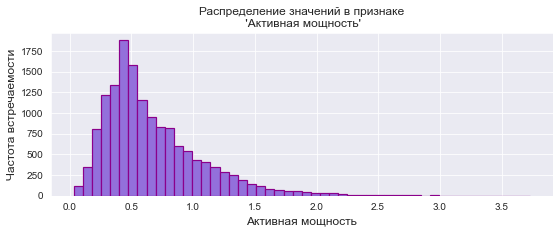

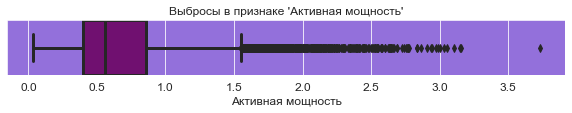

In [8]:
outliers_and_distribution_features(
    data_arc, 
    'Активная мощность', 
    'Активная мощность', 
    'mediumpurple')

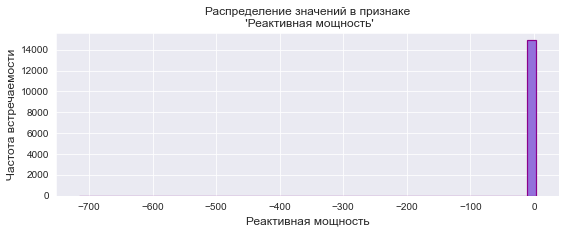

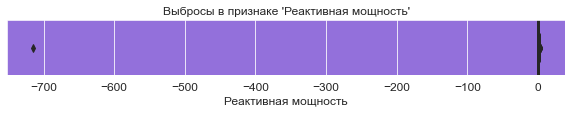

In [9]:
outliers_and_distribution_features(
    data_arc, 
    'Реактивная мощность', 
    'Реактивная мощность', 
    'mediumpurple')

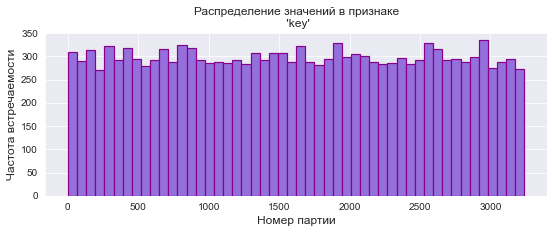

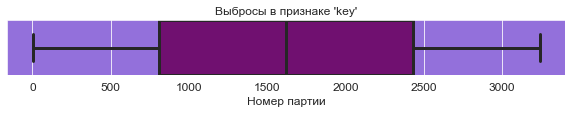

In [10]:
outliers_and_distribution_features(
    data_arc, 
    'key', 
    'Номер партии', 
    'mediumpurple')

In [11]:
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'], format='%Y-%m-%dT%H:%M:%S')
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'], format='%Y-%m-%dT%H:%M:%S')
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


**Вывод по датасету об электродах(data_arc):**
* В датасете 14876 строк, 5 признаков
* Пропусков и дубликатов нету
* Начало нагрева самой первой дуги было 2019-05-03 11:02:14, а конец нагрева самой последней дуги было 2019-09-01 04:36:08
* Из описательной статистике видно выброс в признаке 'Реактивная мощность' = -715.504924. Реактивная мощность не может быть отрицательной
* Распределение не равномерное

**Анализируем данные о подаче сыпучих материалов (объём)**

In [12]:
analyze_data(data_bulk)

Первые 5 строк датасета --------------------------------------------------------------------------------------


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


Последние 5 строк датасета -----------------------------------------------------------------------------------


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0
3128,3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,52.0


Статистика по датасету ---------------------------------------------------------------------------------------
               key      Bulk 1      Bulk 2       Bulk 3       Bulk 4  \
count  3129.000000  252.000000   22.000000  1298.000000  1014.000000   
mean   1624.383509   39.242063  253.045455   113.879045   104.394477   
std     933.337642   18.277654   21.180578    75.483494    48.184126   
min       1.000000   10.000000  228.000000     6.000000    12.000000   
25%     816.000000   27.000000  242.000000    58.000000    72.000000   
50%    1622.000000   31.000000  251.500000    97.500000   102.000000   
75%    2431.000000   46.000000  257.750000   152.000000   133.000000   
max    3241.000000  185.000000  325.000000   454.000000   281.000000   

           Bulk 5      Bulk 6      Bulk 7  Bulk 8      Bulk 9     Bulk 10  \
count   77.000000  576.000000   25.000000     1.0   19.000000  176.000000   
mean   107.025974  118.925347  305.600000    49.0   76.315789   83.284091   
std     8

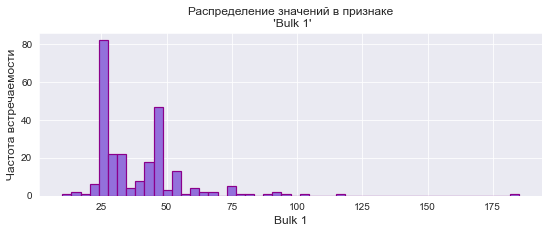

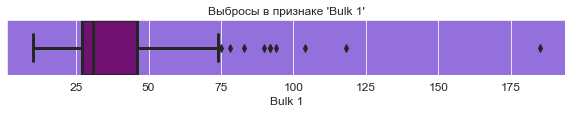

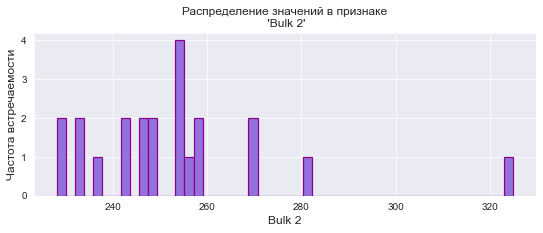

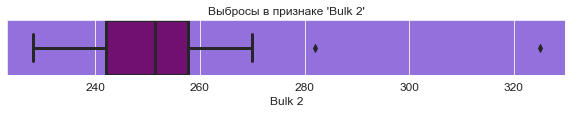

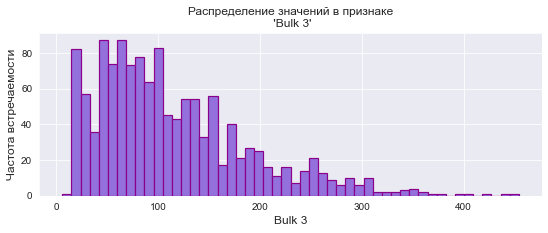

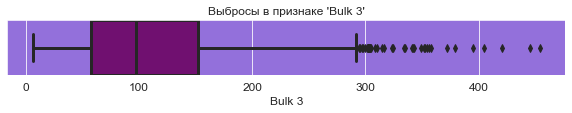

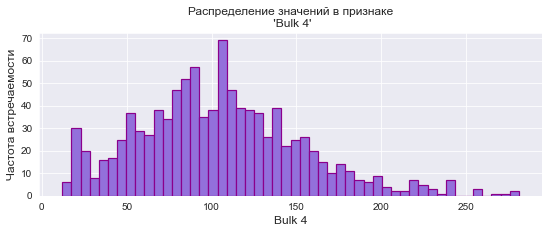

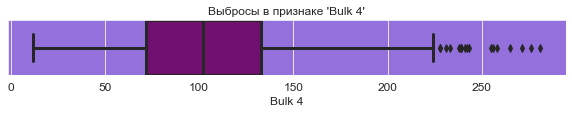

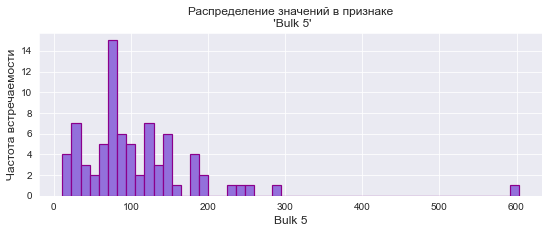

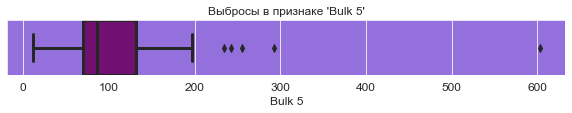

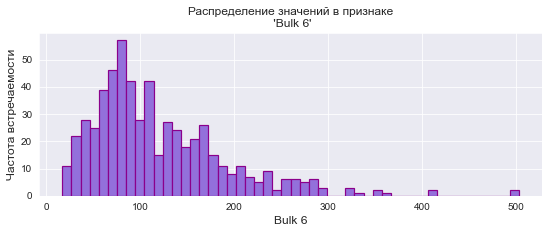

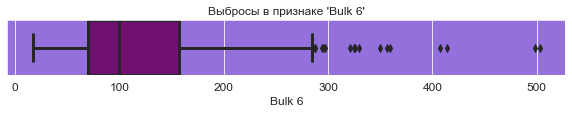

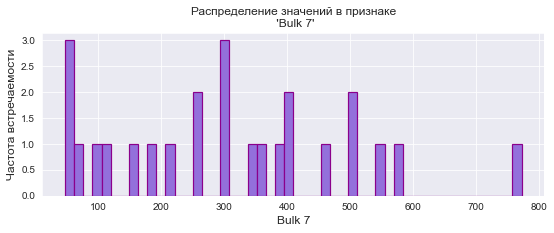

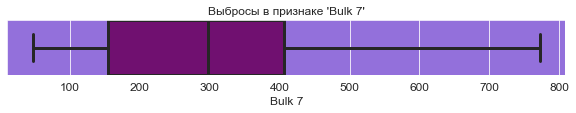

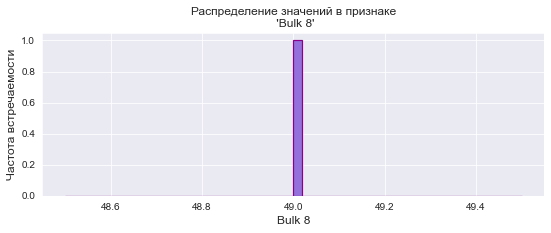

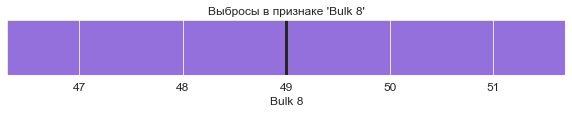

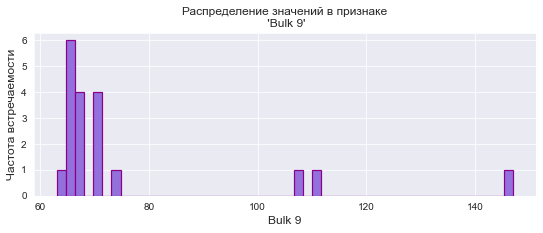

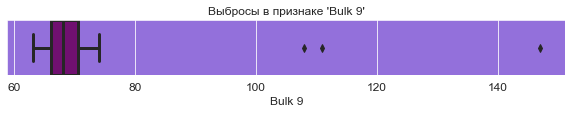

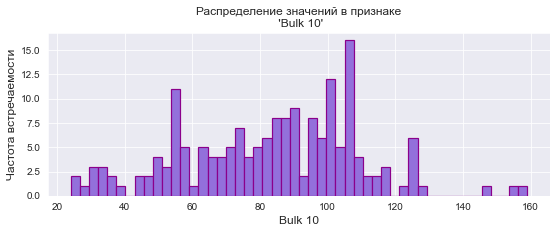

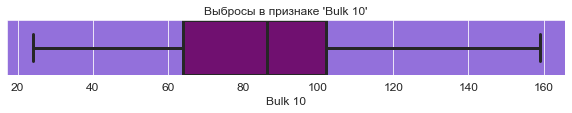

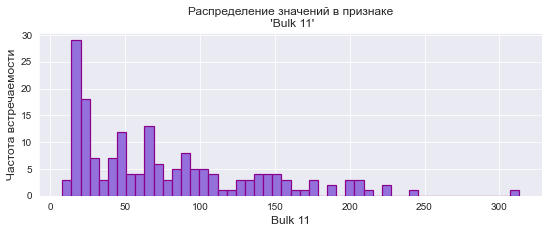

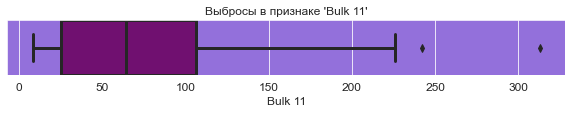

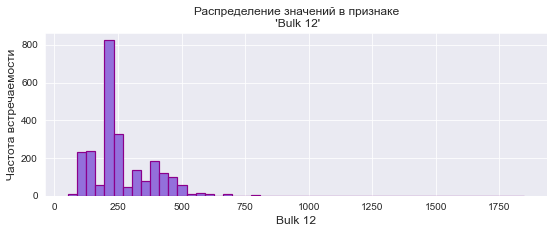

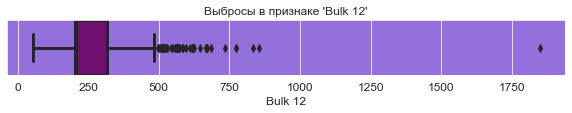

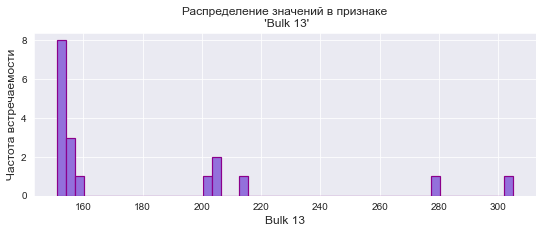

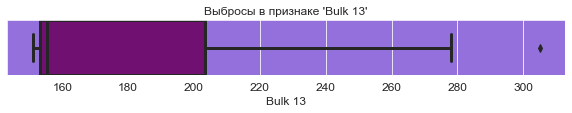

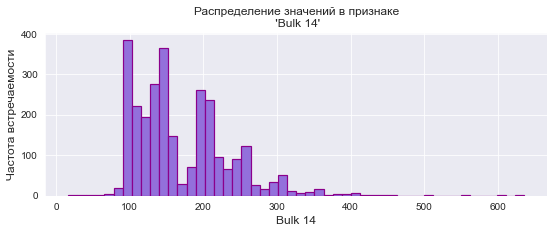

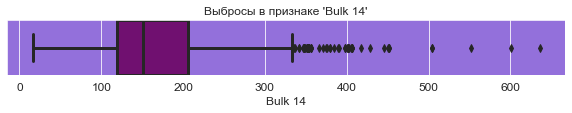

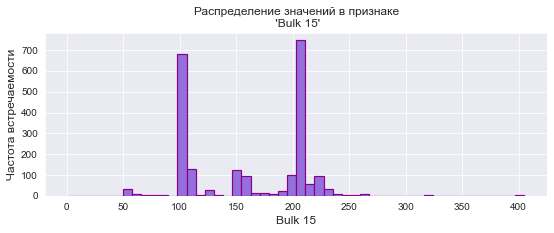

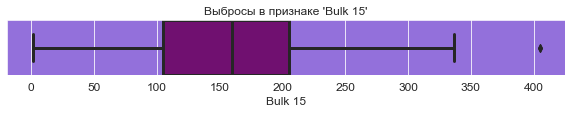

In [13]:
for i in range(1, 16):
    outliers_and_distribution_features(
        data_bulk, 
        f'Bulk {i}', 
        f'Bulk {i}', 
        'mediumpurple')

**Вывод по датасету о подаче сыпучих материалов (объём) (data_bulk):**
* В датасете 16 признаков
* Большое кол-во пропусков, дубликатов нету
* Явных выбросов нету, но какие значения у данного признака считаются за выбросы хотелось бы уточнить
* Распределения не равномерные

**Анализируем данные о подаче сыпучих материалов (время)**

In [14]:
analyze_data(data_bulk_time)

Первые 5 строк датасета --------------------------------------------------------------------------------------


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


Последние 5 строк датасета -----------------------------------------------------------------------------------


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3124,3237,NaN,NaN,2019-08-31 22:51:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-31 22:46:52,NaN,2019-08-31 22:46:52,2019-08-31 22:46:52
3125,3238,NaN,NaN,2019-08-31 23:39:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-31 23:33:09,NaN,2019-08-31 23:33:09,2019-08-31 23:33:09
3126,3239,NaN,NaN,NaN,NaN,NaN,2019-09-01 01:51:58,NaN,NaN,NaN,NaN,NaN,2019-09-01 01:39:41,NaN,2019-09-01 01:33:25,2019-09-01 01:33:25
3127,3240,NaN,NaN,NaN,NaN,NaN,2019-09-01 03:12:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-01 02:41:27,2019-09-01 02:41:27
3128,3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-01 04:05:34,2019-09-01 04:05:34


Статистика по датасету ---------------------------------------------------------------------------------------
               key
count  3129.000000
mean   1624.383509
std     933.337642
min       1.000000
25%     816.000000
50%    1622.000000
75%    2431.000000
max    3241.000000
Общая информация по датасету ---------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 n

In [15]:
for i in range(1, 16):
    data_bulk_time[f'Bulk {i}'] = pd.to_datetime(data_bulk_time[f'Bulk {i}'], format='%Y-%m-%dT%H:%M:%S')
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[ns]
 15  Bulk 15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


**Вывод по датасету о подаче сыпучих материалов (время) (data_bulk_time):**
* В датасете 16 признаков
* Большое кол-во пропусков, дубликатов нету
* Поменяли тип данных у всех признаков, которые содержат дату и время на datetime64

**Кол-во пропусков в каждом признаке датасета data_bulk_time совпадает кол-вом пропусков в датасете data_bulk возможно тогда можно сделать вывод, что просто не было подачи сыпучих материалов и тогда все пропуски можно заполнить нулями**

**Еще эти два датасета можно объединить по признаку key**

**Анализируем данные о продувке сплава газом**

In [16]:
analyze_data(data_gas)

Первые 5 строк датасета --------------------------------------------------------------------------------------


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


Последние 5 строк датасета -----------------------------------------------------------------------------------


,key,Газ 1
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103
3238,3241,12.680959


Статистика по датасету ---------------------------------------------------------------------------------------
               key        Газ 1
count  3239.000000  3239.000000
mean   1621.861377    11.002062
std     935.386334     6.220327
min       1.000000     0.008399
25%     812.500000     7.043089
50%    1622.000000     9.836267
75%    2431.500000    13.769915
max    3241.000000    77.995040
Общая информация по датасету ---------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None
Кол-во пропусков в каждом столбце датасета -------------------------------------------------------------------
Кол-во пропусков: key      0
Газ 1    0
dtype: int64
----------------

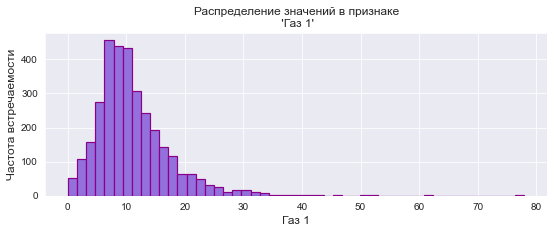

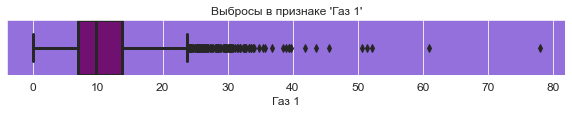

In [17]:
outliers_and_distribution_features(
    data_gas, 
    'Газ 1', 
    'Газ 1', 
    'mediumpurple')

**Вывод по датасету о продувке сплава газом(data_gas):**
* В датасете 3239 строк, 2 признака
* Пропусков и дубликатов нету
* Из описательной статистике видно значение похожее на выброс в признаке 'Газ 1' = 77.995040, что больше среднего значения по этому признаку в 7 раз. Но опять может есть какое-то обоснование этому значению и тогда это не будет считаться выбросом

**Анализируем результаты измерения температур**

In [18]:
analyze_data(data_temp)

Первые 5 строк датасета --------------------------------------------------------------------------------------


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


Последние 5 строк датасета -----------------------------------------------------------------------------------


,key,Время замера,Температура
15902,3241,2019-09-01 04:03:30,1586.0
15903,3241,2019-09-01 04:16:12,NaN
15904,3241,2019-09-01 04:22:39,NaN
15905,3241,2019-09-01 04:33:42,NaN
15906,3241,2019-09-01 04:38:08,NaN


Статистика по датасету ---------------------------------------------------------------------------------------
                key   Температура
count  15907.000000  13006.000000
mean    1607.880870   1591.840920
std      942.212073     21.375851
min        1.000000   1191.000000
25%      790.000000   1581.000000
50%     1618.000000   1591.000000
75%     2427.000000   1601.000000
max     3241.000000   1705.000000
Общая информация по датасету ---------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB
None
Кол-во пропусков в каждом столбце датасета -------------------------------------

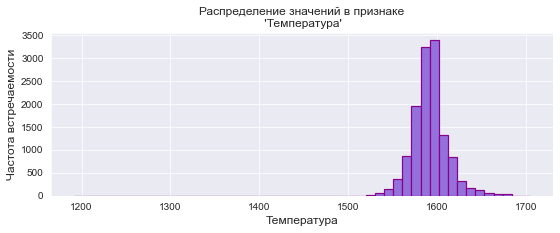

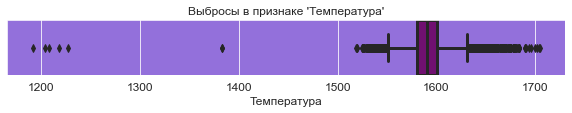

In [19]:
outliers_and_distribution_features(
    data_temp, 
    'Температура', 
    'Температура', 
    'mediumpurple')

In [20]:
data_temp['Время замера'] = pd.to_datetime(data_temp[f'Время замера'], format='%Y-%m-%dT%H:%M:%S')
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           15907 non-null  int64         
 1   Время замера  15907 non-null  datetime64[ns]
 2   Температура   13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


**Вывод по датасету с результатами измерения температур(data_temp):**
* В датасете 15907 строк в признаке Время замера и 13006 строк в признаке Температура, 3 признака
* Есть пропуски в признаке 'Температура', дубликатов нету
* Явных выбросов нету
* Перевели признак 'Время замера' в тип datetime64

**Хотелось бы опять уточнить с чем тут связаны пропуски в данных**

**Анализируем данные о проволочных материалах (объём)**

In [21]:
analyze_data(data_wire)

Первые 5 строк датасета --------------------------------------------------------------------------------------


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Последние 5 строк датасета -----------------------------------------------------------------------------------


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3076,3237,38.088959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,56.128799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,143.357761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,34.070400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,3241,63.117595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Статистика по датасету ---------------------------------------------------------------------------------------
               key       Wire 1       Wire 2      Wire 3      Wire 4  Wire 5  \
count  3081.000000  3055.000000  1079.000000   63.000000   14.000000   1.000   
mean   1623.426485   100.895853    50.577323  189.482681   57.442842  15.132   
std     932.996726    42.012518    39.320216   99.513444   28.824667     NaN   
min       1.000000     1.918800     0.030160    0.144144   24.148801  15.132   
25%     823.000000    72.115684    20.193680   95.135044   40.807002  15.132   
50%    1619.000000   100.158234    40.142956  235.194977   45.234282  15.132   
75%    2434.000000   126.060483    70.227558  276.252014   76.124619  15.132   
max    3241.000000   330.314424   282.780152  385.008668  113.231044  15.132   

           Wire 6     Wire 7      Wire 8     Wire 9  
count   73.000000  11.000000   19.000000  29.000000  
mean    48.016974  10.039007   53.625193  34.155752  
std   

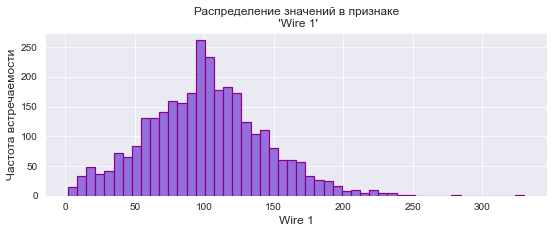

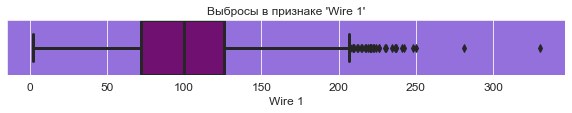

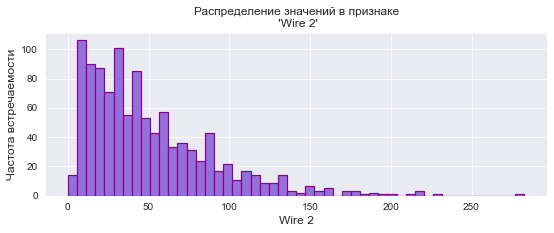

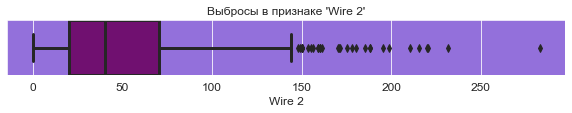

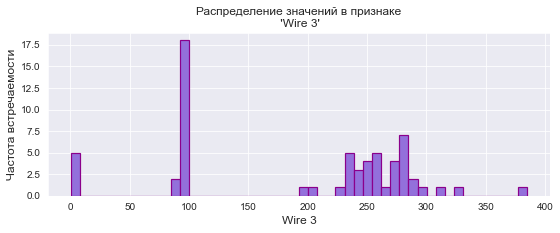

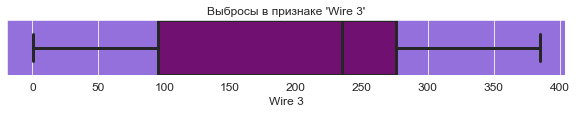

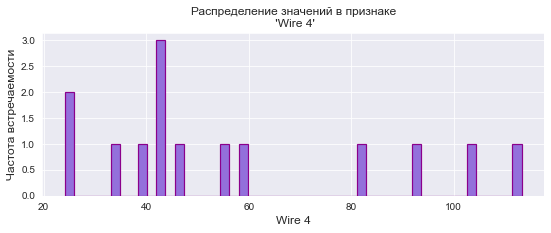

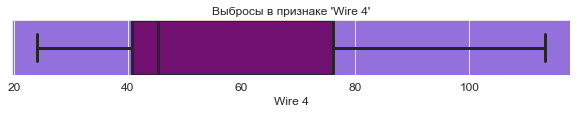

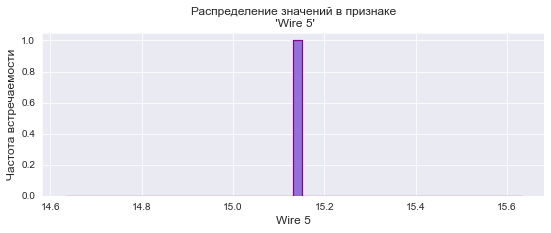

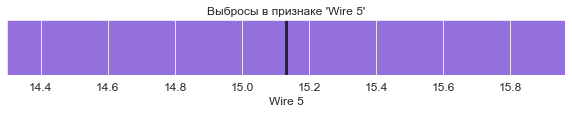

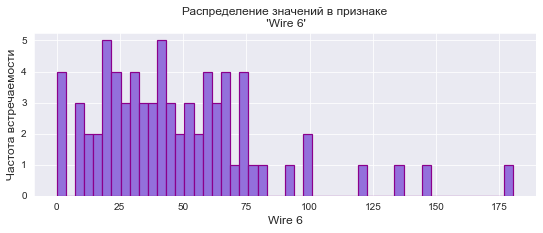

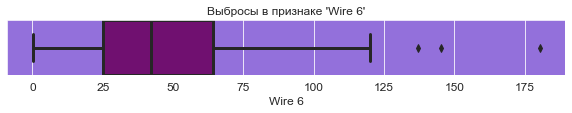

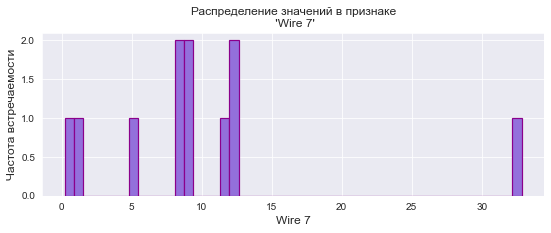

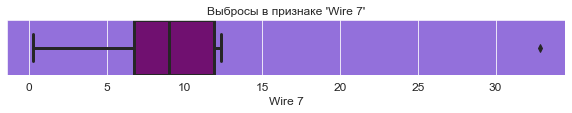

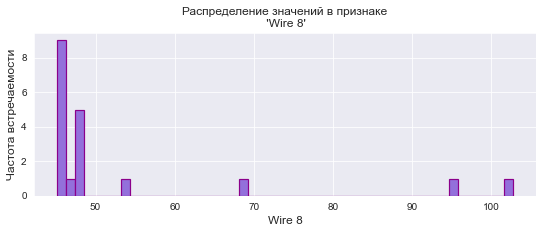

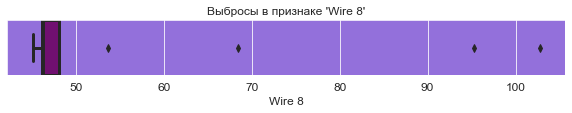

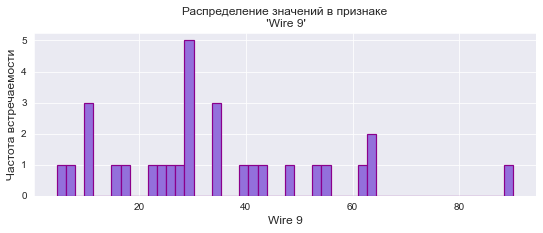

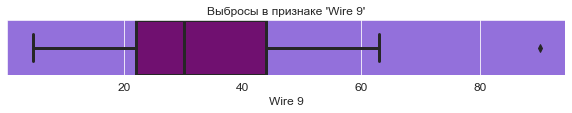

In [22]:
for i in range(1, 10):
    outliers_and_distribution_features(
        data_wire, 
        f'Wire {i}', 
        f'Wire {i}', 
        'mediumpurple')

**Вывод по датасету о проволочных материалах (объём) (data_wire):**
* В датасете 10 признаков, в них очень разное кол-во данных от 1 до 3055 в зависимости от кол-ва пропусков
* Большое кол-во пропусков, в некоторых признаках пропуски составляют почти все кол-во данных, дубликатов нету
* Явных выбросов нету, но какие значения у данного признака считаются за выбросы хотелось бы уточнить
* Распределения не равномерные

**Анализируем данные о проволочных материалах (время)**

In [23]:
analyze_data(data_wire_time)

Первые 5 строк датасета --------------------------------------------------------------------------------------


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Последние 5 строк датасета -----------------------------------------------------------------------------------


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3076,3237,2019-08-31 22:50:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,2019-08-31 23:38:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,2019-09-01 01:50:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,2019-09-01 03:12:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,3241,2019-09-01 04:16:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Статистика по датасету ---------------------------------------------------------------------------------------
               key
count  3081.000000
mean   1623.426485
std     932.996726
min       1.000000
25%     823.000000
50%    1619.000000
75%    2434.000000
max    3241.000000
Общая информация по датасету ---------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None
Кол-во проп

In [24]:
for i in range(1, 10):
    data_wire_time[f'Wire {i}'] = pd.to_datetime(data_wire_time[f'Wire {i}'], format='%Y-%m-%dT%H:%M:%S')
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


**Вывод по датасету о проволочных материалах (время) (data_wire_time):**
* В датасете 10 признаков
* Большое кол-во пропусков, дубликатов нету
* Поменяли тип данных у всех признаков, которые содержат дату и время на datetime64

**Кол-во пропусков в каждом признаке датасета data_wire_time совпадает с кол-вом пропусков в датасете data_wire тогда можно сделать вывод, что просто проволоку не использовали для изменения состава стали в этом опыте и тогда все пропуски можно заполнить нулями**

**Еще эти два датасета можно объединить по признаку key**

**Также нужно превести все названия признаков в правильный стиль(змеиный стиль, нижний регистр и все длинные названия переменных через нижнее подчеркивание должны быть указаны). Еще нужно будет в некоторых столбцах поменять тип float на int, так как там данные содержат только целочисленные значения.**

### 3. Предобработка данных

In [25]:
#помним, что у нас был выброс в датасете data_arc(данные об электродах) в признаке 'Реактивная мощность', значение меньше нуля
data_arc[data_arc['Реактивная мощность'] <= 0]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


In [26]:
#так как отрицательной мощности не может быть, удалим всю эту строку:
data_arc = data_arc.drop(data_arc[data_arc['Реактивная мощность'] <= 0].index)#.reset_index(drop=True)
data_arc.describe()

,key,Активная мощность,Реактивная мощность
count,14875.000000,14875.000000,14875.000000
mean,1615.186756,0.670453,0.500723
std,934.593897,0.408170,0.310880
min,1.000000,0.030002,0.020806
25%,806.000000,0.395295,0.291003
50%,1617.000000,0.555565,0.415984
75%,2429.000000,0.857049,0.637403
max,3241.000000,3.731596,2.676388


В датасете data_temp 'Температура'(последняя в партии) является целевым признаком для нашей задачи, поэтому нужно оставить в этом датасете только самое первое измерение в партие и самое последние, и тогда потом мы сможем дать на обучение модели самые первые значения температур в партиях, они будут как feature, а последние измерения будут как target.

In [27]:
#удаляю все промежуточные температуры из датафрейма data_temp

data_temp_start_finish = pd.DataFrame()
for uniq_key in data_temp['key'].unique():
    temp_sorted = data_temp[data_temp['key']==uniq_key].sort_values(by='Время замера')
    data_temp_start_finish = data_temp_start_finish.append(temp_sorted.head(1))
    data_temp_start_finish = data_temp_start_finish.append(temp_sorted.tail(1))
    
data_temp = data_temp_start_finish
data_temp

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
10,2,2019-05-03 11:59:12,1602.0
11,3,2019-05-03 12:13:17,1596.0
...,...,...,...
15893,3239,2019-09-01 02:24:15,NaN
15894,3240,2019-09-01 02:39:01,1617.0
15901,3240,2019-09-01 03:35:16,NaN
15902,3241,2019-09-01 04:03:30,1586.0


Видим, что есть пропуски в признаке 'Температура', избавимся от них, так как не полные данные не подойдут для модели.

In [28]:
print(data_temp.isna().sum())

key               0
Время замера      0
Температура     739
dtype: int64


In [29]:
#удаляю все строки с партиями, где нет данных по температуре
temp_nan = data_temp[data_temp['Температура'].isna()]['key'].unique()
print(temp_nan)
data_temp = data_temp[~data_temp['key'].isin(temp_nan)]
data_temp

[2500 2501 2502 2503 2504 2505 2506 2507 2508 2509 2510 2511 2512 2513
 2514 2515 2516 2517 2518 2519 2520 2521 2522 2523 2524 2525 2526 2527
 2528 2529 2530 2531 2532 2533 2534 2535 2536 2537 2538 2539 2540 2541
 2542 2543 2544 2545 2546 2547 2548 2549 2550 2551 2552 2553 2554 2555
 2556 2557 2558 2559 2560 2561 2562 2563 2564 2565 2566 2567 2568 2569
 2570 2571 2572 2573 2574 2575 2576 2577 2578 2579 2580 2581 2582 2583
 2584 2585 2586 2587 2588 2589 2590 2591 2592 2593 2594 2595 2596 2597
 2598 2599 2600 2601 2602 2603 2604 2605 2606 2607 2608 2609 2610 2611
 2612 2613 2614 2615 2616 2617 2618 2619 2620 2621 2622 2623 2624 2625
 2626 2627 2628 2629 2630 2631 2632 2633 2634 2635 2636 2637 2638 2639
 2640 2641 2642 2643 2644 2645 2646 2647 2648 2649 2650 2651 2652 2653
 2654 2655 2656 2657 2658 2659 2660 2661 2662 2663 2664 2665 2666 2667
 2668 2669 2670 2671 2672 2673 2674 2675 2676 2677 2678 2679 2680 2681
 2682 2684 2685 2686 2687 2688 2689 2690 2691 2692 2693 2694 2695 2696
 2697 

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
10,2,2019-05-03 11:59:12,1602.0
11,3,2019-05-03 12:13:17,1596.0
...,...,...,...
12258,2497,2019-08-06 01:53:50,1589.0
12259,2498,2019-08-06 02:03:49,1591.0
12263,2498,2019-08-06 02:25:31,1594.0
12264,2499,2019-08-06 02:40:25,1569.0


In [30]:
# проверим, не осталось ли пропусков
print(data_temp.isna().sum())

key             0
Время замера    0
Температура     0
dtype: int64


Также удалим выбросы из целевого признака 'Температура', значение температуры не должно быть меньше примерно 1450 градусов.

In [31]:
#удаляю все строки с партиями в датасете data_temp(результаты измерения температуры), где температура <= 1450
before_1450_temp = data_temp[data_temp['Температура'] <= 1450]['key'].unique()
print(before_1450_temp)
data_temp = data_temp[~data_temp['key'].isin(before_1450_temp)]
data_temp = data_temp.reset_index(drop=True)
data_temp

[ 867 1214 1619 2052]


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:30:39,1613.0
2,2,2019-05-03 11:37:27,1581.0
3,2,2019-05-03 11:59:12,1602.0
4,3,2019-05-03 12:13:17,1596.0
...,...,...,...
4941,2497,2019-08-06 01:53:50,1589.0
4942,2498,2019-08-06 02:03:49,1591.0
4943,2498,2019-08-06 02:25:31,1594.0
4944,2499,2019-08-06 02:40:25,1569.0


In [32]:
full_temp = []
    
for uniq_key in data_temp['key'].unique():
    tmp = data_temp[data_temp['key']==uniq_key].reset_index(drop=True)
    start = tmp.loc[0,'Температура']
    finish = tmp.loc[1,'Температура']

    full_temp.append([uniq_key, start, finish])

data_temp = pd.DataFrame(full_temp,
                        columns=['key',
                                 'Первоначальная температура',
                                 'Конечная температура'])
data_temp

,key,Первоначальная температура,Конечная температура
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0
3,4,1601.0,1625.0
4,5,1576.0,1602.0
...,...,...,...
2468,2495,1570.0,1591.0
2469,2496,1554.0,1591.0
2470,2497,1571.0,1589.0
2471,2498,1591.0,1594.0


Высчитаем затраченную полную мощность для каждой партии датасета data_arc и результат присоединим к остальным данным. Для этого нужно значение активной мощности электродов возвести в квадрат каждой партии и умножить на активную мощность в квадрате этой же партии, затем из полученного произведения извлечь корень. Вот формула:

$$
S = \sqrt{P^{2} + Q^{2}}\   ,
$$
где S - полная мощность, P - активная мощность, Q - реактивная мощность(обозначения соответствуют физическим обозначениям)

In [35]:
#вычисляю полную мощность для data_arc
data_arc['Полная мощность'] = np.sqrt((data_arc['Активная мощность'])**2 + (data_arc['Реактивная мощность'])**2)
data_arc

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Полная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,1.193639
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0.959010
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0.896038
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,1.970470
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0.807239
...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,0.640648
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,0.855559
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,0.874560
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,0.264489


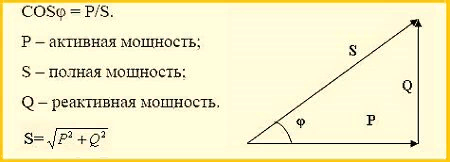

In [36]:
#поскольку остальные признаки были использованы при вычисление полной мощности, оставляю в data_arc
#только признак 'Полная мощность' для этого объединим значения мощностей одних партий
data_arc = data_arc.groupby('key').agg({'Полная мощность': sum})
data_arc

,Полная мощность
key,
1,5.826395
2,3.649216
3,2.989534
4,3.814962
5,4.035758
...,...
3237,4.844982
3238,2.696542
3239,5.611883


Заполним пропуски в датасетах data_bulk и data_wire нулями, так как если значения нету в этих данных значит это действие просто не происходило

In [37]:
print(data_bulk.isna().sum())
data_wire.isna().sum()

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64


key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64

In [38]:
#заполняю пропуски нулями в data_bulk и data_wire
data_bulk.fillna(0, inplace=True)
data_wire.fillna(0, inplace=True)

In [39]:
#проверим остались ли пропуски
print(data_bulk.isna().sum())
data_wire.isna().sum()

key        0
Bulk 1     0
Bulk 2     0
Bulk 3     0
Bulk 4     0
Bulk 5     0
Bulk 6     0
Bulk 7     0
Bulk 8     0
Bulk 9     0
Bulk 10    0
Bulk 11    0
Bulk 12    0
Bulk 13    0
Bulk 14    0
Bulk 15    0
dtype: int64


key       0
Wire 1    0
Wire 2    0
Wire 3    0
Wire 4    0
Wire 5    0
Wire 6    0
Wire 7    0
Wire 8    0
Wire 9    0
dtype: int64

Объединим все таблицы в одну

In [40]:
#объединяю датафреймы data_arc, data_temp, data_bulk, data_gas и data_wire
data = data_temp.merge(right=data_arc,
                       how='inner',
                       on='key')\
                .merge(right=data_bulk,
                       how='inner',
                       on='key')\
                .merge(right=data_gas,
                       how='inner',
                       on='key')\
                .merge(right=data_wire,
                       how='inner',
                       on='key')

data

,key,Первоначальная температура,Конечная температура,Полная мощность,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,...,Газ 1,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,1571.0,1613.0,5.826395,0.0,0.0,0.0,43.0,0.0,0.0,...,29.749986,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1581.0,1602.0,3.649216,0.0,0.0,0.0,73.0,0.0,0.0,...,12.555561,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1596.0,1599.0,2.989534,0.0,0.0,0.0,34.0,0.0,0.0,...,28.554793,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1601.0,1625.0,3.814962,0.0,0.0,0.0,81.0,0.0,0.0,...,18.841219,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1576.0,1602.0,4.035758,0.0,0.0,0.0,78.0,0.0,0.0,...,5.413692,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,2495,1570.0,1591.0,3.986869,0.0,0.0,21.0,0.0,0.0,0.0,...,7.125735,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2321,2496,1554.0,1591.0,5.057033,0.0,0.0,0.0,63.0,0.0,0.0,...,9.412616,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2322,2497,1571.0,1589.0,2.885017,0.0,0.0,0.0,85.0,0.0,0.0,...,6.271699,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2323,2498,1591.0,1594.0,4.143749,0.0,0.0,90.0,0.0,0.0,0.0,...,14.953657,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
data['Wire 5'].unique()

array([0.])

In [42]:
#удаляю столбец 'Wire 5', так как он 'пустой'
data.drop(['Wire 5'],inplace=True, axis=1)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   key                         2325 non-null   int64  
 1   Первоначальная температура  2325 non-null   float64
 2   Конечная температура        2325 non-null   float64
 3   Полная мощность             2325 non-null   float64
 4   Bulk 1                      2325 non-null   float64
 5   Bulk 2                      2325 non-null   float64
 6   Bulk 3                      2325 non-null   float64
 7   Bulk 4                      2325 non-null   float64
 8   Bulk 5                      2325 non-null   float64
 9   Bulk 6                      2325 non-null   float64
 10  Bulk 7                      2325 non-null   float64
 11  Bulk 8                      2325 non-null   float64
 12  Bulk 9                      2325 non-null   float64
 13  Bulk 10                     2325 

Проведем корреляционный анализ получившегося датафрейма

CPU times: total: 3.89 s
Wall time: 10.9 s


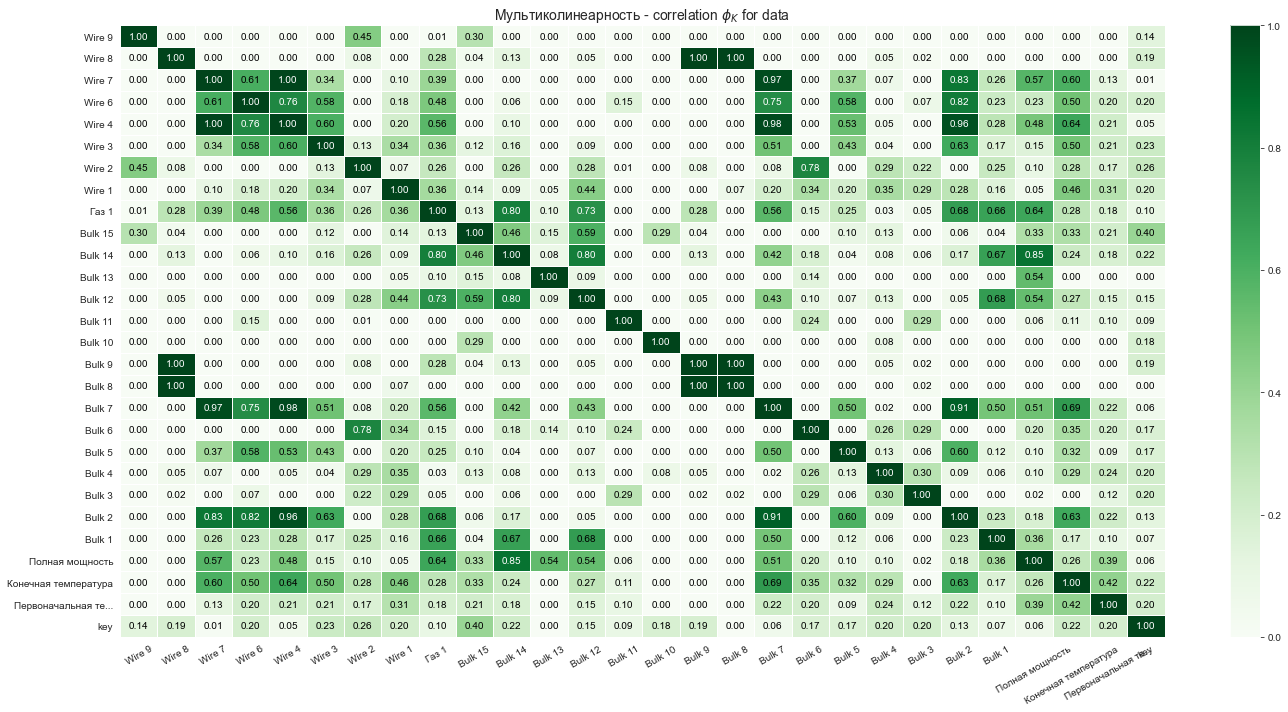

In [44]:
%%time

cols = data.select_dtypes('number').columns.tolist()
phik_overview = data.phik_matrix(interval_cols=cols)
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"Мультиколинеарность - correlation $\phi_K$ for data",
                        fontsize_factor=1,
                        figsize=(20, 10))
plt.xticks(rotation = 30)
plt.tight_layout()

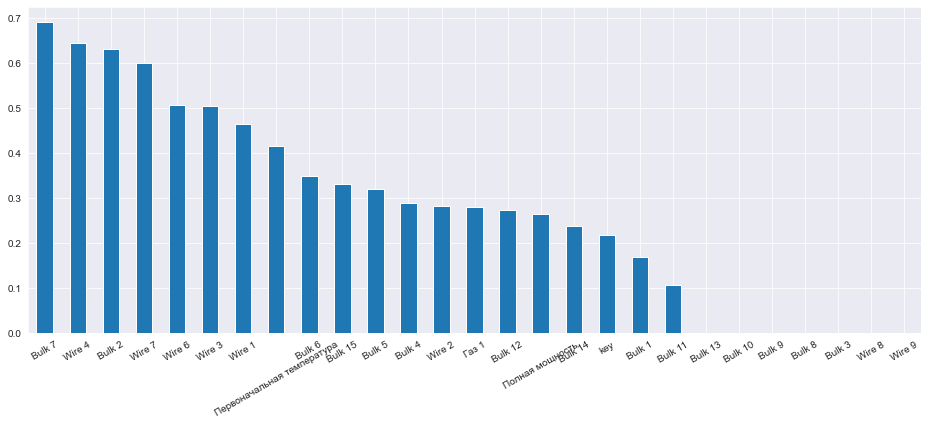

In [45]:
phik_overview['Конечная температура'].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(16, 6), fontsize=10)
plt.xticks(rotation=30)
plt.show()

Видна аномально сильная корреляция между признаками(аномально сильной корреляцией будем считать значение больше 0.85):
* Bulk 9  и  Wire 8
* Bulk 8  и  Wire 8
* Wire 4  и  Wire 7
* Bulk 7  и  Wire 7
* Wire 7  и  Wire 4 
* Bulk 7  и  Wire 4
* Bulk 2  и  Wire 4
* Wire 8  и  Bulk 9
* Bulk 8  и  Bulk 9
* Wire 8  и  Bulk 8
* Wire 7  и  Bulk 7
* Wire 4  и  Bulk 7 
* Bulk 2  и  Bulk 7
* Wire 4  и  Bulk 2
* Bulk 7  и  Bulk 2

Удалим один признак из каждой пары аномально коррелирующих признаков, с учетом отдавая приоритет признаку, который сильнее коррелирует еще с целевым, так как это тоже плохо для модели.

In [46]:
data.drop(['Wire 8'], inplace=True, axis=1)
data.drop(['Wire 4'], inplace=True, axis=1)
data.drop(['Bulk 7'], inplace=True, axis=1)
data.drop(['Bulk 9'], inplace=True, axis=1)
#data.drop(['Wire 7'], inplace=True, axis=1)
#data.drop(['Bulk 2'], inplace=True, axis=1)

CPU times: total: 2.75 s
Wall time: 3.48 s


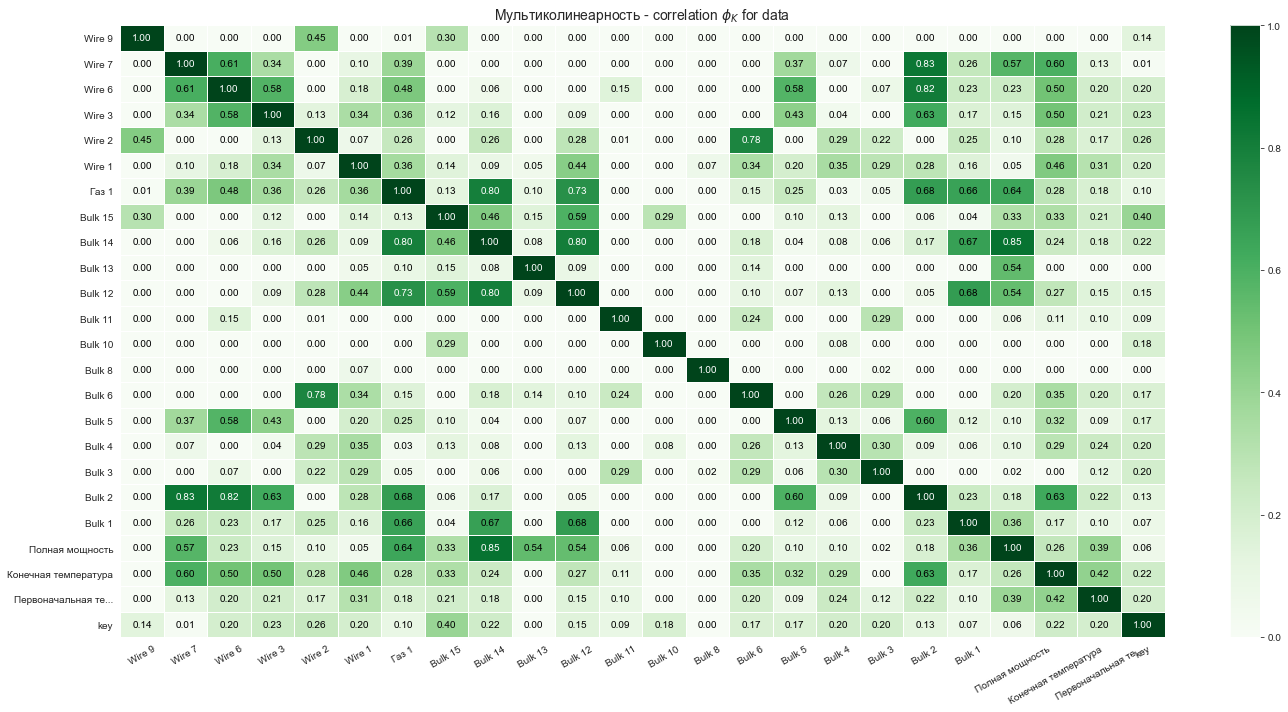

In [47]:
%%time

cols = data.select_dtypes('number').columns.tolist()
phik_overview = data.phik_matrix(interval_cols=cols)
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"Мультиколинеарность - correlation $\phi_K$ for data",
                        fontsize_factor=1,
                        figsize=(20, 10))
plt.xticks(rotation = 30)
plt.tight_layout()

Посмотрим на итоговые признаки, которые попали в датасет

In [48]:
data

,key,Первоначальная температура,Конечная температура,Полная мощность,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,...,Bulk 13,Bulk 14,Bulk 15,Газ 1,Wire 1,Wire 2,Wire 3,Wire 6,Wire 7,Wire 9
0,1,1571.0,1613.0,5.826395,0.0,0.0,0.0,43.0,0.0,0.0,...,0.0,150.0,154.0,29.749986,60.059998,0.00000,0.0,0.0,0.0,0.0
1,2,1581.0,1602.0,3.649216,0.0,0.0,0.0,73.0,0.0,0.0,...,0.0,149.0,154.0,12.555561,96.052315,0.00000,0.0,0.0,0.0,0.0
2,3,1596.0,1599.0,2.989534,0.0,0.0,0.0,34.0,0.0,0.0,...,0.0,152.0,153.0,28.554793,91.160157,0.00000,0.0,0.0,0.0,0.0
3,4,1601.0,1625.0,3.814962,0.0,0.0,0.0,81.0,0.0,0.0,...,0.0,153.0,154.0,18.841219,89.063515,0.00000,0.0,0.0,0.0,0.0
4,5,1576.0,1602.0,4.035758,0.0,0.0,0.0,78.0,0.0,0.0,...,0.0,151.0,152.0,5.413692,89.238236,9.11456,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,2495,1570.0,1591.0,3.986869,0.0,0.0,21.0,0.0,0.0,0.0,...,0.0,129.0,223.0,7.125735,89.150879,0.00000,0.0,0.0,0.0,0.0
2321,2496,1554.0,1591.0,5.057033,0.0,0.0,0.0,63.0,0.0,0.0,...,0.0,129.0,226.0,9.412616,114.179527,0.00000,0.0,0.0,0.0,0.0
2322,2497,1571.0,1589.0,2.885017,0.0,0.0,0.0,85.0,0.0,0.0,...,0.0,124.0,226.0,6.271699,94.086723,9.04800,0.0,0.0,0.0,0.0
2323,2498,1591.0,1594.0,4.143749,0.0,0.0,90.0,0.0,0.0,0.0,...,0.0,129.0,207.0,14.953657,118.110717,0.00000,0.0,0.0,0.0,0.0


**Вывод по предобработке данных:**
* Удалил выброс в датасете data_arc, также удалил все значения температур, которые меньше 1450 в датасете data_temp и в нем еще удалил промежуточные температуры партий. (Датасет data_temp уменьшился с 6432 строк до 4946, а когда разбил данные первоначальной температуры и конечной на разные столбцы получилось 2473 строк)
* В датасете data_temp разделили на разные столбцы признаки 'Первоначальная температура' и 'Конечная температура', за целевой признак приняли значения  признака 'Конечная температура'.
* Посчитали полную мощность в датасете data_arc для каждой партии и оставили только получившийся признак в этом датафрейме, так как при образование его участвовали все остальные
* Заполнил пропуски в датафреймах data_wire и data_bulk нулями, потому что эти пропуски означали просто отсутствие какого-либо этапа
* Объединил все датафреймы по номеру партии key, только по номерам, которые есть во всех датафреймах, чтобы бы не образовались пропуски, также не стал включать в итоговый датасет два датафрейма data_bulk_time и data_wire_time, так как все значения их есть в других датасетах, а время на мой взгляд не влияет на целевой признак. Также в итоговом датасете получился один полностью пустой признак, который я удалил - это Wire 5
* Построил корреляционную таблицу и проанализировав её выявил признаки, которые необходимо удалить, так как они искажат результат модели. Аномально высокие значения корреляции я посчитал от 0.83, поэтому удалил следующие признаки: Wire 4, Wire 7, Wire 8, Bulk 2, Bulk 7, Bulk 9. Большинство из них сильно корреллировало с целевым признаком, поэтому отбор этих признаков исходил ещё из за этого, чтобы получить более качественную модель

### 4. Распределение данных на выборки и обучение моделей

**Распределение данных**

In [49]:
features = data.drop(['Конечная температура', 'key'], axis=1)
target = data['Конечная температура']
features.shape, target.shape

((2325, 22), (2325,))

In [50]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.25,
                                                                            random_state=RND)
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((1743, 22), (582, 22), (1743,), (582,))

Выборки распределенны в соотношение 75%/25%, features = 1743, а target = 582

### Обучение моделей

In [51]:
kf_tree = KFold(5, shuffle=True, random_state=RND)

**Модель LinearRegression**

In [52]:
lr = LinearRegression()
# объявляем пайплайн
pipe_lr = imbPipeline([
    ('scaler', MinMaxScaler()), 
    ('lr', lr)
])
# визуализируем получившийся пайплайн
pipe_lr

Pipeline(steps=[('scaler', MinMaxScaler()), ('lr', LinearRegression())])

In [53]:
# получим список гиперпараметров пайплайна для модели LinearRegression
pd.DataFrame(pipe_lr.get_params().keys())

,0
0,memory
1,steps
2,verbose
3,scaler
4,lr
5,scaler__clip
6,scaler__copy
7,scaler__feature_range
8,lr__copy_X
9,lr__fit_intercept


In [54]:
%%time

lr_params = {
    'lr__fit_intercept':[True,False],
    'lr__copy_X':[True, False]
    }

lr_rscv = RandomizedSearchCV(pipe_lr, lr_params, scoring='neg_mean_absolute_error', cv=5, \
                             refit=True, verbose=1, n_jobs=-1)
lr_rscv.fit(features_train, target_train)

best_model_lr = lr_rscv.best_estimator_
best_params_model_lr = lr_rscv.best_params_
best_score_model_lr = abs(lr_rscv.best_score_)

print()
print(f'MAE для модели LinearRegression на traine - {best_score_model_lr}')
print()
print(f'Лучшая модель LinearRegression: {best_model_lr}')
print(f'Параметры лучшей модели LinearRegression: {best_params_model_lr}')
print()

results_lr = pd.DataFrame(lr_rscv.cv_results_)
results_lr['mean_test_score'] = - results_lr['mean_test_score']
results_lr['mean_test_score'].head()

index_lr = lr_rscv.best_index_
fit_time_lr = results_lr['mean_fit_time'][index_lr]
score_time_lr = results_lr['mean_score_time'][index_lr]

print(f'Время обучения моделей: {fit_time_lr}')
print(f'Время предсказания моделей: {score_time_lr}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits

MAE для модели LinearRegression на traine - 6.750666568358658

Лучшая модель LinearRegression: Pipeline(steps=[('scaler', MinMaxScaler()), ('lr', LinearRegression())])
Параметры лучшей модели LinearRegression: {'lr__fit_intercept': True, 'lr__copy_X': True}

Время обучения моделей: 0.03948330879211426
Время предсказания моделей: 0.008026456832885743
CPU times: total: 125 ms
Wall time: 837 ms


**Модель Ridge**

In [55]:
ridge = Ridge()
# объявляем пайплайн
pipe_ridge = imbPipeline([
    ('scaler', MinMaxScaler()), 
    ('ridge', ridge)
])
# визуализируем получившийся пайплайн
pipe_ridge

Pipeline(steps=[('scaler', MinMaxScaler()), ('ridge', Ridge())])

In [56]:
# получим список гиперпараметров пайплайна для модели Ridge
pd.DataFrame(pipe_ridge.get_params().keys())

,0
0,memory
1,steps
2,verbose
3,scaler
4,ridge
5,scaler__clip
6,scaler__copy
7,scaler__feature_range
8,ridge__alpha
9,ridge__copy_X


In [57]:
%%time

ridge_params =  {'ridge__alpha': np.logspace(-3, 10, num = 30), 
                 'ridge__copy_X': [False], 
                 'ridge__solver': ['svd', 
                            'cholesky', 
                            'lsqr', 
                            'sparse_cg', 
                            'sag', 
                            'saga', 
                            'lbfgs']}

ridge_rscv = RandomizedSearchCV(pipe_ridge, ridge_params, scoring='neg_mean_absolute_error', cv=5, \
                             refit=True, verbose=1, n_jobs=-1)
ridge_rscv.fit(features_train, target_train)

best_model_ridge = ridge_rscv.best_estimator_
best_params_model_ridge = ridge_rscv.best_params_
best_score_model_ridge = abs(ridge_rscv.best_score_)

print()
print(f'MAE для модели Ridge на traine - {best_score_model_ridge}')
print()
print(f'Лучшая модель Ridge: {best_model_ridge}')
print(f'Параметры лучшей модели Ridge: {best_params_model_ridge}')
print()

results_ridge = pd.DataFrame(ridge_rscv.cv_results_)
results_ridge['mean_test_score'] = - results_ridge['mean_test_score']
results_ridge['mean_test_score'].head()

index_ridge = ridge_rscv.best_index_
fit_time_ridge = results_ridge['mean_fit_time'][index_ridge]
score_time_ridge = results_ridge['mean_score_time'][index_ridge]

print(f'Время обучения моделей: {fit_time_ridge}')
print(f'Время предсказания моделей: {score_time_ridge}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits

MAE для модели Ridge на traine - 6.579676426574638

Лучшая модель Ridge: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('ridge',
                 Ridge(alpha=0.4893900918477494, copy_X=False,
                       solver='sparse_cg'))])
Параметры лучшей модели Ridge: {'ridge__solver': 'sparse_cg', 'ridge__copy_X': False, 'ridge__alpha': 0.4893900918477494}

Время обучения моделей: 0.016240262985229494
Время предсказания моделей: 0.004914617538452149
CPU times: total: 188 ms
Wall time: 337 ms


**Модель Lasso**

In [58]:
lasso = linear_model.Lasso()
# объявляем пайплайн
pipe_lasso = imbPipeline([
    ('scaler', MinMaxScaler()), 
    ('lasso', lasso)
])
# визуализируем получившийся пайплайн
pipe_lasso

Pipeline(steps=[('scaler', MinMaxScaler()), ('lasso', Lasso())])

In [59]:
# получим список гиперпараметров пайплайна для модели Lasso
pd.DataFrame(pipe_lasso.get_params().keys())

,0
0,memory
1,steps
2,verbose
3,scaler
4,lasso
5,scaler__clip
6,scaler__copy
7,scaler__feature_range
8,lasso__alpha
9,lasso__copy_X


In [60]:
%%time

lasso_params =  {'lasso__alpha': np.logspace(-3, 10, num = 30),
 'lasso__selection': ['cyclic', 'random']}

lasso_rscv = RandomizedSearchCV(pipe_lasso, lasso_params, scoring='neg_mean_absolute_error', cv=5, \
                             refit=True, verbose=1, n_jobs=-1)
lasso_rscv.fit(features_train, target_train)

best_model_lasso = lasso_rscv.best_estimator_
best_params_model_lasso = lasso_rscv.best_params_
best_score_model_lasso = abs(lasso_rscv.best_score_)

print()
print(f'MAE для модели Lasso на traine - {best_score_model_lasso}')
print()
print(f'Лучшая модель Lasso: {best_model_lasso}')
print(f'Параметры лучшей модели Lasso: {best_params_model_lasso}')
print()

results_lasso = pd.DataFrame(lasso_rscv.cv_results_)
results_lasso['mean_test_score'] = - results_lasso['mean_test_score']
results_lasso['mean_test_score'].head()

index_lasso = lasso_rscv.best_index_
fit_time_lasso = results_lasso['mean_fit_time'][index_lasso]
score_time_lasso = results_lasso['mean_score_time'][index_lasso]

print(f'Время обучения моделей: {fit_time_lasso}')
print(f'Время предсказания моделей: {score_time_lasso}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits

MAE для модели Lasso на traine - 6.417702625908099

Лучшая модель Lasso: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lasso', Lasso(alpha=0.06210169418915616))])
Параметры лучшей модели Lasso: {'lasso__selection': 'cyclic', 'lasso__alpha': 0.06210169418915616}

Время обучения моделей: 0.008719110488891601
Время предсказания моделей: 0.0029589176177978516
CPU times: total: 141 ms
Wall time: 268 ms


**Модель RandomForestRegressor**

In [61]:
forest = RandomForestRegressor(random_state=RND)
# объявляем пайплайн
pipe_forest = imbPipeline([
    ('scaler', MinMaxScaler()), 
    ('forest', forest)
])
# визуализируем получившийся пайплайн
pipe_forest

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('forest', RandomForestRegressor(random_state=270323))])

In [62]:
# получим список гиперпараметров пайплайна для модели Lasso
pd.DataFrame(pipe_forest.get_params().keys())

,0
0,memory
1,steps
2,verbose
3,scaler
4,forest
5,scaler__clip
6,scaler__copy
7,scaler__feature_range
8,forest__bootstrap
9,forest__ccp_alpha


In [63]:
%%time

forest_params = {
    'forest__max_depth': range(1, 20),
    'forest__min_samples_leaf': range(1, 6, 2),
    'forest__n_estimators': range(10, 101, 10),
    }

forest_rscv = RandomizedSearchCV(pipe_forest, forest_params, scoring='neg_mean_absolute_error', cv=kf_tree,\
                                 random_state=RND, refit=True, verbose=1, n_jobs=-1)
forest_rscv.fit(features_train, target_train)

best_model_forest = forest_rscv.best_estimator_
best_params_model_forest = forest_rscv.best_params_
best_score_model_forest = abs(forest_rscv.best_score_)

print()
print(f'MAE для модели RandomForestRegressor на traine: {best_score_model_forest}')
print()
print(f'Лучшая модель RandomForestRegressor: {best_model_forest}')
print(f'Гиперпараметры лучшей модели случайного леса: {best_params_model_forest}')
print()

results_forest = pd.DataFrame(forest_rscv.cv_results_)
results_forest['mean_test_score'] = - results_forest['mean_test_score']
results_forest['mean_test_score'].head()

index_forest = forest_rscv.best_index_
fit_time_forest = results_forest['mean_fit_time'][index_forest]
score_time_forest = results_forest['mean_score_time'][index_forest]

print(f'Время обучения моделей: {fit_time_forest}')
print(f'Время предсказания моделей: {score_time_forest}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits

MAE для модели RandomForestRegressor на traine: 6.247053564024371

Лучшая модель RandomForestRegressor: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('forest',
                 RandomForestRegressor(max_depth=8, min_samples_leaf=3,
                                       n_estimators=50, random_state=270323))])
Гиперпараметры лучшей модели случайного леса: {'forest__n_estimators': 50, 'forest__min_samples_leaf': 3, 'forest__max_depth': 8}

Время обучения моделей: 0.46163787841796877
Время предсказания моделей: 0.015958404541015624
CPU times: total: 953 ms
Wall time: 6.49 s


**Модель CatBoostRegressor**

In [64]:
cat = CatBoostRegressor(logging_level = 'Silent', random_state=RND)
# объявляем пайплайн
pipe_cat = imbPipeline([
    ('scaler', MinMaxScaler()), 
    ('cat', cat)
])
# визуализируем получившийся пайплайн
pipe_cat

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('cat',
                 <catboost.core.CatBoostRegressor object at 0x000001458564EC70>)])

In [65]:
# получим список гиперпараметров пайплайна для модели CatBoostRegressor
pd.DataFrame(pipe_cat.get_params().keys())

,0
0,memory
1,steps
2,verbose
3,scaler
4,cat
5,scaler__clip
6,scaler__copy
7,scaler__feature_range
8,cat__loss_function
9,cat__logging_level


In [66]:
%%time

# создаем словарь с гиперпараметрами
params_catboost = {
    'cat__depth': range(1, 20), 
    'cat__learning_rate': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08],
    'cat__n_estimators': range(1, 101) 
    }
cat_rscv = RandomizedSearchCV(pipe_cat, params_catboost, scoring='neg_mean_absolute_error', cv=kf_tree,
                                       refit=True, verbose=1, n_jobs=-1, random_state=RND)
cat_rscv.fit(features_train, target_train)

best_model_cat = cat_rscv.best_estimator_
best_params_model_cat = cat_rscv.best_params_
best_score_model_cat = abs(cat_rscv.best_score_)

print()
print(f'MAE для модели CatBoostRegressor на traine: {best_score_model_cat}')
print()
print(f'Лучшая модель CatBoostRegressor: {best_model_cat}')
print(f'Гиперпараметры лучшей модели CatBoostRegressor: {best_params_model_cat}')
print()

results_cat = pd.DataFrame(cat_rscv.cv_results_)
results_cat['mean_test_score'] = - results_cat['mean_test_score']
results_cat['mean_test_score'].head()

index_cat = cat_rscv.best_index_
fit_time_cat = results_cat['mean_fit_time'][index_cat]
score_time_cat = results_cat['mean_score_time'][index_cat]

print(f'Время обучения модели: {fit_time_cat}')
print(f'Время предсказания модели: {score_time_cat}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits

MAE для модели CatBoostRegressor на traine: 6.222968166010395

Лучшая модель CatBoostRegressor: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('cat',
                 <catboost.core.CatBoostRegressor object at 0x000001458564FBB0>)])
Гиперпараметры лучшей модели CatBoostRegressor: {'cat__n_estimators': 89, 'cat__learning_rate': 0.06, 'cat__depth': 8}

Время обучения модели: 2.637959384918213
Время предсказания модели: 0.0021122455596923827
CPU times: total: 2.94 s
Wall time: 19 s


**Модель LGBMRegressor**

In [67]:
lgbm = LGBMRegressor(random_state=RND) 
# объявляем пайплайн
pipe_lgbm = imbPipeline([
    ('scaler', MinMaxScaler()), 
    ('lgbm', lgbm)
])
# визуализируем получившийся пайплайн
pipe_lgbm

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lgbm', LGBMRegressor(random_state=270323))])

In [68]:
# получим список гиперпараметров пайплайна для модели Lasso
pd.DataFrame(pipe_lgbm.get_params().keys())

,0
0,memory
1,steps
2,verbose
3,scaler
4,lgbm
5,scaler__clip
6,scaler__copy
7,scaler__feature_range
8,lgbm__boosting_type
9,lgbm__class_weight


In [69]:
%%time

lgbm_params = {
    'lgbm__num_leaves': range(1, 10), 
    'lgbm__max_depth': range(1, 10), 
    'lgbm__learning_rate': [0.0125, 0.025, 0.05, 0.1], 
    'lgbm__n_estimators': range(1, 51)   
    }


lgbm_rscv = RandomizedSearchCV(pipe_lgbm, lgbm_params, scoring='neg_mean_absolute_error', cv=kf_tree,
                                       refit=True, verbose=1, n_jobs=-1, random_state=RND)
lgbm_rscv.fit(features_train, target_train)

best_model_lgbm = lgbm_rscv.best_estimator_
best_params_model_lgbm = lgbm_rscv.best_params_
best_score_model_lgbm = abs(lgbm_rscv.best_score_)

print()
print(f'MAE для модели LGBMRegressor на traine: {best_score_model_lgbm}')
print()
print(f'Лучшая модель LGBMRegressor: {best_model_lgbm}')
print(f'Гиперпараметры лучшей модели LGBMRegressor: {best_params_model_lgbm}')
print()

results_lgbm = pd.DataFrame(lgbm_rscv.cv_results_)
results_lgbm['mean_test_score'] = - results_lgbm['mean_test_score']
results_lgbm['mean_test_score'].head()

index_lgbm = lgbm_rscv.best_index_
fit_time_lgbm = results_lgbm['mean_fit_time'][index_lgbm]
score_time_lgbm = results_lgbm['mean_score_time'][index_lgbm]

print(f'Время обучения моделей: {fit_time_lgbm}')
print(f'Время предсказания моделей: {score_time_lgbm}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits

MAE для модели LGBMRegressor на traine: 6.195692944135759

Лучшая модель LGBMRegressor: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lgbm',
                 LGBMRegressor(max_depth=9, n_estimators=47, num_leaves=9,
                               random_state=270323))])
Гиперпараметры лучшей модели LGBMRegressor: {'lgbm__num_leaves': 9, 'lgbm__n_estimators': 47, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.1}

Время обучения моделей: 0.049121665954589847
Время предсказания моделей: 0.004660940170288086
CPU times: total: 281 ms
Wall time: 2.93 s


**Построим таблицу с результатами каждой модели**

In [70]:
index = ['LinearRegression',
         'Ridge',
         'Lasso',
         'RandomForestRegressor',
         'CatBoostRegressor',
         'LGBMRegressor']

value = {
        'Время обучения модели': [fit_time_lr,
                                 fit_time_ridge,
                                 fit_time_lasso,
                                 fit_time_forest,
                                 fit_time_cat,
                                 fit_time_lgbm],
        'Время предсказания модели': [score_time_lr,
                                     score_time_ridge,
                                     score_time_lasso,
                                     score_time_forest,
                                     score_time_cat,
                                     score_time_lgbm],
        'MAE на обучающей выборке': [best_score_model_lr,
                                     best_score_model_ridge,
                                     best_score_model_lasso,
                                     best_score_model_forest,
                                     best_score_model_cat,
                                     best_score_model_lgbm]}

results_models = pd.DataFrame(data=value, index=index)

results_models.sort_values(by='MAE на обучающей выборке', ascending=True)

,Время обучения модели,Время предсказания модели,MAE на обучающей выборке
LGBMRegressor,0.049122,0.004661,6.195693
CatBoostRegressor,2.637959,0.002112,6.222968
RandomForestRegressor,0.461638,0.015958,6.247054
Lasso,0.008719,0.002959,6.417703
Ridge,0.016240,0.004915,6.579676
LinearRegression,0.039483,0.008026,6.750667


**Вывод: Лучший результат на обучающей выборке показала модель CatBoostRegressor: MAE = 6.27**

Посмотрим результат лучшей модели на тестовой выборке

In [80]:
test_predict_lgbm = best_model_lgbm.predict(features_test)

test_mae_lgbm = mean_absolute_error(target_test, test_predict_lgbm)
test_mae_lgbm

5.754382658686401

**MAE на тестовой выборке модели LGBMRegressor = 5.75, максимально заявленное значение для нашей задачи равно 6.8, значит наша модель готова и удовлетворяет условиям заказчика.**

In [72]:
def distribution_tar_pred(test, predict):
    plt.figure(figsize=(8, 6))
    pd.Series(predict).hist(bins=20, alpha=0.8)
    pd.Series(test).hist(bins=20, alpha=0.8)
    plt.legend(['Предсказанные значения', 'Правильные значения'])
    plt.title('График распределения предсказанных значений к правильным', y=1.05)
    plt.xlabel('Предсказанные / Правильные значения')
    plt.ylabel('Количество')
    plt.subplot()

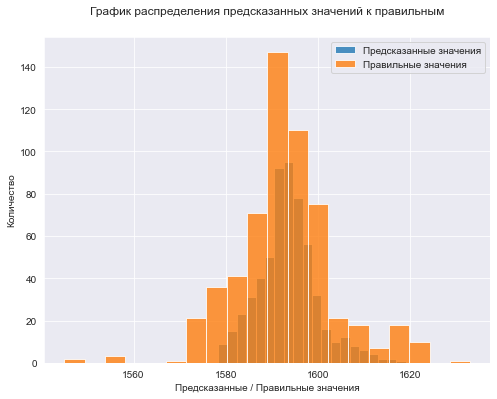

In [73]:
distribution_tar_pred(target_test, test_predict_cat)

**Проверим лучшую модель на адекватность**

In [74]:
model_dummy = DummyRegressor()
model_dummy.fit(features_train, target_train)
predict_dummy = model_dummy.predict(features_test)
test_mae_dum = mean_absolute_error(target_test, predict_dummy)
test_mae_dum

7.8246229887641

Модель DummyRegressor показала результат MAE на тестовой выборке = 7.82, что выше результата нашей модели. Значит наша модель CatBoostRegressor прошла проверку на адекватность. 

**Проведём анализ важности факторов для нашей модели**

In [75]:
# получим названия признаков лучшей модели
features_names = best_model_cat.feature_names_in_
features_names

array(['Первоначальная температура', 'Полная мощность', 'Bulk 1',
       'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 8',
       'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15',
       'Газ 1', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 6', 'Wire 7',
       'Wire 9'], dtype=object)

In [76]:
# выведем значения коэффициентов важности признаков лучшей модели
feature_importances = best_model_cat.named_steps['cat'].feature_importances_
feature_importances

array([2.58911006e+01, 2.88466187e+01, 2.30361849e+00, 1.73122231e-02,
       1.61852767e+00, 2.01915975e+00, 5.11300741e-01, 8.16003790e+00,
       0.00000000e+00, 1.93694499e-01, 5.44628855e-01, 1.66768516e+00,
       9.54739114e-02, 4.16804860e+00, 5.41397668e+00, 3.79412775e+00,
       6.14918392e+00, 6.01332209e+00, 2.35594417e-01, 1.07640326e+00,
       1.28018470e+00, 0.00000000e+00])

In [77]:
# объединим в датафрейм названия признаков и коэффициенты их важности
feature_importance_df = pd.DataFrame({'features': list(features_names),
    'feature_importances': feature_importances})

# отсортируем признаки по убыванию значения коэффициента важности и выведем датафрейм
feature_importance_df = feature_importance_df.sort_values(
    'feature_importances', 
    ascending = False).reset_index(drop = True)
    
feature_importance_df

,features,feature_importances
0,Полная мощность,28.846619
1,Первоначальная температура,25.891101
2,Bulk 6,8.160038
3,Wire 1,6.149184
4,Wire 2,6.013322
5,Bulk 15,5.413977
6,Bulk 14,4.168049
7,Газ 1,3.794128
8,Bulk 1,2.303618
9,Bulk 4,2.019160


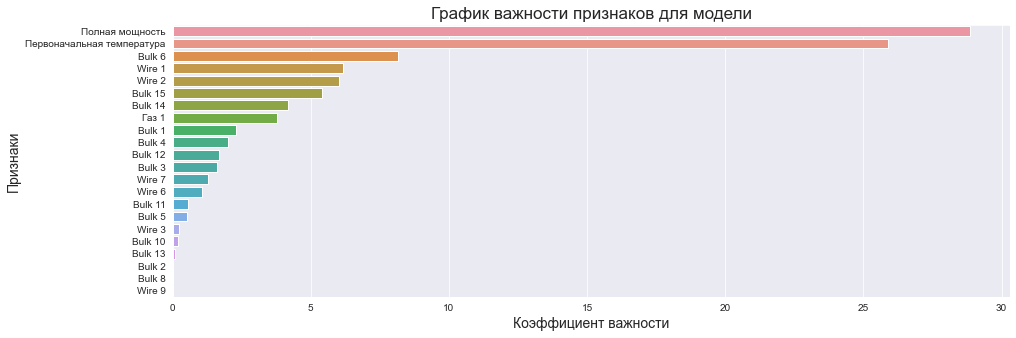

In [78]:
plt.figure(figsize = (15, 5))
sns.barplot(data=feature_importance_df, y="features", x="feature_importances")
plt.title(f'График важности признаков для модели', fontsize = 17)
plt.ylabel('Признаки', fontsize=14)
plt.xlabel('Коэффициент важности', fontsize=14)
plt.show()

**Проанализировав график можно сделать вывод, что признаки: Bulk 11, Bulk 3, Bulk 5, Bulk 13, Bulk 10, Wire 3, Bulk 2, Wire 9, Bulk 8, Wire 6 можно удалить, так как они слабозначимы для модели. А на факторы такие как: Полная мощность и Первоначальная температура - металлургическому комбинату ООО «Так закаляем сталь» нужно уделить особое внимание, так как от этого зависит больше всего потребляемая электроэнергии на этапе обработки стали.**

## Общий вывод

* Сначала загрузили все данные, нам было дано 7 файлов, затем создали функцию для общего анализа каждого датасета и построили функцию для графического анализа каждого датасета, проанализировали все данные
* На этапе обработке данных удалили выброс в датасете data_arc(данные об электродах) в признаке 'Реактивная мощность', значение меньше нуля чего быть не может; удалил все промежуточные температуры из датафрейма data_temp и разделил на разные столбцы значения первоначальной температуры и конечной, конечная температура в партии - это наш целевой признак; удалил выбросы из целевого признака 'Температура', значение температуры не должно быть меньше 1450 градусов; для датафрема data_arc вычислил полную мощность, вычеслив её удалил все остальные признаки этого датасета, так как при получение нового признака участвовали все остальные, поэтому их можно удалить; заполнил пропуски нулями в data_bulk и data_wire, так как пропуски в этих данных означали, что просто не происходило это действие
* Соединил все датафреймы в один по key(ключу), который есть во всех датасетах. При анализе получившегося датасета, заметил, что признак Wire 5 полностью пустой, поэтому удалил его из датафрейма
* Провел корреляционный анализ получившегося датафрейма, удалил все сильно коррелирующие признаки между собой и особенно с целевым. Были удалены следующие признаки: Wire 4, Wire 8, Bulk 7, Bulk 9
* Разделил данные на выборки, размер признаков для обучающей выборке получился (1743, 22), размер целевого признака для обучающей выборки получился (1743), размер признаков для тестовой выборке получился (582, 22) и размер целевого признака для обучающей выборки получился (582)
* Обучил 6 моделей:  LinearRegression, Ridge, Lasso, RandomForestRegressor, CatBoostRegressor, LGBMRegressor. При их создание использовал Pipline воизбежание утечки данных и переобучения моделей. Лучший результат на обучающей выборке показала модель LGBMRegressor, где MAE = 6.195693. На тестовой выборке лучшая модель показала MAE = 5.754382658686401
* Построил график точности (график распределения предсказанных значений к правильным), также проверил нашу лучшую модель на адекватность и она её успешно прошла
* **Задача металлургического комбината ООО «Так закаляем сталь» выполнена, построенна модель LGBMRegressor, которая предсказывает температуру стали с ошибкой в диапозоне 5.7 градусов, когда по требованиям максимальная ошибка температуры не должна составлять больше 6.8 градусов, что способствует уменьшению потребления электроэнергии на этапе обработки стали**

## Отчёт
1) В плане были следующие пункты:
* **Проведение обзора данных (EDA)**
    * Подготовка и анализ данных:
        * Импорт необходимых библиотек;
        * Чтение файлов и сохранение полученных данных в переменные;
        * Получение общей информации о таблицах (head(), tail(), info(), describe(), isna().sum(), duplicated().sum());
        * Графическое представление данных из таблиц;
        * Проверка данных на аномалии;
        * Выводы по каждому файлу.
    * Предобработка данных:
        * Корректировка типов данных;
        * Заполнение пропусков и удаление дубликатов(при наличии);
        * Удаление выбросов и аномальных значений не характерных для конкретного этапа;
        * Выделение признаков и таргета(целевого признака);
        * Соединение всех таблиц в единую;
        * Выводы.
    * Исследование итоговой таблицы с данными:
        * Аналитический анализ;
        * Корреляционный анализ;
        * Удаление сильно коррелирующих признаков(при наличии);
        * Выводы.
* **Построение модели машинного обучения**
    * Обучение модели:
        * Разделение данных на обучающую и тестовую выборки;
        * Масштабирование данных(при необходимости);
        * Обучение моделей с автоматизированным перебором гиперпараметров:
            * Обучение линейных моделей;
            * Обучение деревяных моделей;
            * Обучение моделей градиентного бустинга.
        * Выбор лучшей модели.
    * Проверка лучшей модели:
        * Тестирование модели на тестовой выборке;
        * Если значение MAE оказалось на тестовых данных > 6.8, то доработка модели;
        * Проверка модели на адекватность, сравня с результатом MAE константной модели;
        * Анализ важности факторов
        * Предложение заказчику список факторов на которые ему следует обратить внимание.
* **Общий вывод**

**Все пункты плана были выполнены.**

2) Трудности, возникшие в процессе решения проекта, и способы их решения
Я столкнулся всего с 3 трудноcтями:
* Первая была в выделение начальной и конечной температур в датасете data_temp, и удаление промежуточных значений температур. Для этого я создал пустой датафрейм в который циклом добавлял значения только начальных и конечных температур партий, потом удалил строки с пропусками в температуре.
* Вторая была в применение пайплайна, а точнее в его особенных названиях гиперпарметров, так как раньше я его почти не использовал не знал этой особенности, поэтому долго не понимал в чем была ошибка. Чтобы решить эту проблему нашел метод pipe.get_params().keys(), который выводит названия всех допустих гиперпараметров для конкретной модели.
* И последняя была в анализе важности факторов для итоговой модели, так как я использовал пайплайн при обучение модели воизбежание переобучение, просто метод feature_importances_ не работал с пайплайном. Для этого сначала получил названия признаков лучшей модели и методом model.named_steps['pipe'].feature_importances_ получил значения коэффициентов важности признаков, затем объединил в датафрейм названия признаков и коэффициенты их важности.

Все трудности были решены.

3) Ключевые шаги в решении задачи
Ключевыми шагами в решении задачи стали следующие пункты плана:
* Предобработка данных, благодаря ей были переданы более качественные данные для обучения моделей
* Обучение модели, тут благодаря автоматизированному подбору гиперпараметров был получен наилучший результат

4) Итоговой моделью была выбрана LGBMRegressor - это модель с наименьшей MAE среди всех обученных. MAE LGBMRegressor = 5.7, это означает, что модель ошибается на 5.7 градуса при прогнозировании. Также модель определила, что на температуру больше всего влияют 2 фактора: Полная мощность и Первоначальная температура, заказчику следует обратить на них внимание. А от факторов таких как: Bulk 11, Bulk 3, Bulk 5, Bulk 13, Bulk 10, Wire 3, Bulk 2, Wire 9, Bulk 8, Wire 6 - заказчик может избавиться, потому что они слабозначимы для модели.

5) Список признаков, используемых для обучения лучшей модели и описание их предобработки:
* Первоначальная температура и Конечная температура, были удалены значения меньше 1450 градусов и партии где были пропуски в значениях температур
* Полная мощность, была посчитана при помощи двух факторов: Активная мощность и Реактивная мощность, в реактивной мощности был удален выброс
* У всех признаков Bulk и Wire, были заменыны пропуски на ноль, так как это означало, что просто отсутствовал конкретный этап

6) Гиперпараметры лучшей модели - LGBMRegressor:
* {'lgbm__num_leaves': 9, 'lgbm__n_estimators': 47, 'lgbm__max_depth': 9, 'lgbm__learning_rate': 0.1}

7) Рекомендации для улучшения модели:

Если предоставят дополнительные еще какие-нибудь данные можно будет выявить новые взаимосвязи и посмотреть их корреляцию с остальными признаками, тогда модель скорее всего еще улучшится. Также можно запросить данные при каких обстоятельствах записывались значения температур, т.е. кем была измерена температура в каждой партии, на каком оборудование, каким конкретно газом продували сплав в каждой партии, какое кол-во различных легирующих материалов и примесей добавляли в каждую партию, потому что от этого всего может зависеть значение температуры.